<img src="./files/universidad-nebrija.jpg" alt="Logo Nebrija" align="right" width=200>


<h2><font color="#004D7F" size=4>Lenguajes de Programación</font></h2>

<h1><font color="#004D7F" size=5>Algoritmo de Shor</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>José Javier Paulet González</font><br>
<font color="#004D7F" size=3>06/03/2022</font><br>
<font color="#004D7F" size=3>Universidad Antonio de Nebrija</font>

</div>

$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
---


<h1><font color="#004D7F" size=15>Algoritmo de Shor</font></h1>

 - Este algoritmo permite factorizar un número **N** en tiempo $\mathcal{O}\left(\log{(N)}^{3}\right)$ y espacio $\mathcal{O}\left(\log{(N)}\right)$
 
 - Se trata de un algoritmo híbrido que utiliza una subrutina cuántica para obtener el periodo de una función y así poder factorizar un número **N**.

 - Se basa en el algoritmo de estimación de fase.
 
 - Este algoritmo permite romper **RSA** en tiempo polinómico.


<h1><font color="#003D7F" size=5>Pasos del algoritmo</font></h1>

1. Elegir un número pseudoaleatorio $a<N$.
2. Calcular el mcd(a,N):
    1. Si es distinto del valor **1** entonces **a** es un factor no trivial de **N** y ya hemos acabado.
    2. Si es igual a **1**, entonces se utiliza una subrutina cuántica para encontrar el periodo **r** de la función:
    
        \begin{equation}
            f(x) = a^{x} mod N
        \end{equation}
        
       Es decir, el valor **r** más pequeño que cumpla que $f(x+r)=f(x)$
       
        1. Si **r** es impar se vuelve al paso 1.
        2. Si es par podemos obtener algún factor de **N** calculando $mcd\left(a^{\frac{r}{2}}\pm 1,N\right)$
       


### Parte cuántica

Las partes del circuito cuántico son:
 1. Generar una superposición de los **2n** qubits de entrada, siendo $n=\lceil\log_{2}{(N)}\rceil$.
 2. Se aplican las puertas $\left(U^{2^{0}},U^{2^{1}},U^{2^{2}},\ldots,U^{2^{2n-1}}\right)$ controladas por los qubits $\left(2n-1,2n-2,2n-3,\ldots,0\right)$ más significativos. La puerta $U$ se define como $U\ket{y}=\ket{ay\ mod\ N}$
 3. Se aplica la transformada de Fourier inversa sobre los primeros $2n$ qubits.
 4. Se miden los $2n$ primeros qubits.

<img src="./files/esquema-shor.png" alt="Circuito Shor" align="center">
 
El operador $U$ representa a la función periódica $f(x)=a^{x}\ mod\ N$ cuyo periodo es $r$. Una vez aplicado este operador de manera controlada, en el primer registro **(2n)** tendremos una superposición de todos los valores de **x** que den la misma salida. Estos valores se separan unos de otros en una distancia **r**, de la forma:

<img src="./files/esquema-shor-funcion-periodica.png" alt="Función periodica" width="300" align="center">

La aplicación de la **transformada de Fourier inversa** en el primer registro convierte el periodo $r$ en $\frac{2^{2n}}{r}$ y elimina el **offset**:

<img src="./files/esquema-shor-funcion-periodica-transformada.png" alt="Función periodica transformada" align="center" width="750">

De esta forma al medir el primer registro **(2n qubits)** obtendremos un número $x$ múltiplo de $\frac{2^{2n}}{r}$, es decir, $x=t\frac{2^{2n}}{r}$, siempre que $r$ divida a $2^{2n}$. En este caso convertiremos la fracción en una fracción irreducible y tomaremos el denominador. Si $r$ no divide a $2^{2n}$, entonces la tranformación final tendría el aspecto:

<img src="./files/esquema-shor-funcion-periodica-transformada-no-divide-sola.png" alt="Función periodica transformada" align="center" width="300">

En este caso, mediremos $t\frac{2^{2n}}{r}$ o un estado cercano. Para obetener el periodo a partir de la medición tenemos que calcular la fracción continua de $t\frac{2^{2n}}{r}$ y quedarnos con el **denominador** de la última convergente cuyo denominador sea menor que **N**, el cuál será el periodo **r** o un factor del periodo **r**.


### Fracciones continuas

Las fracciones continuas son una herramienta matemática para representar números reales de una forma pura. Si dicho **número** es **racional** entonces la fracción continua es **finita**. En el caso en el que dicho **número** sea **irracional** entonces la fraccion continua será **infinita**. La representación en forma de fracción continua de un número real **x** es:


\begin{equation}
 x=[a_{0};a_{1},a_{2},\ldots,a_{n-1}]=a_{0}+\frac{1}{a_{1}+\frac{1}{a_{2}+\frac{1}{\ddots}}}
\end{equation}

#### Cálculo de la fracción continua

Para calcular la fracción continua de un número hay que seguir los siguientes pasos:
 1. Dado un número real **(r)**, se obtiene la parte entera **i** que va a ser el coeficiente $a_{i}$ de nuestra fracción continua.
 2. Se obtiene la parte decimal **d** de el número **r** y se calcula $\frac{1}{d}$ que será nuestra nueva **r** para la siguiente iteración.
 3. Si **d** es igual a **0**, es decir, **r** no tiene parte decimal, entonces se para. Si **d** es distinto de 0 entonces se vuelve al paso **1**.

#### Convergentes

Una aproximación racional $\frac{P_{k}}{Q_{k}}$ de **r** se denomina convergente de **r**:

\begin{equation}
 \frac{P_{k}}{Q_{k}}=[a_{0};a_{1},a_{2},\ldots,a_{k}]=a_{0}+\frac{1}{a_{1}+\frac{1}{a_{2}+\frac{1}{\ddots a_{k}}}}
\end{equation}

Una propiedad importante de las convergentes $\frac{P_{k}}{Q_{k}}$ es que es la mejor aproximación racional del número **r** con un denominador inferior a ${Q_{k}}$.

Para el cálculo de estas convergentes $\frac{P_{k}}{Q_{k}}$ podemos usar las siguiente ecuación recursiva:

\begin{equation}
    \begin{cases}
      P_{k}=a_{k}P_{k-1}+P_{k-2}\\
      Q_{k}=a_{k}Q_{k-1}+Q_{k-2}
    \end{cases}
\end{equation}

Con
\begin{equation}
    \begin{cases}
      P_{0}=a_{0}\\
      Q_{0}=1
    \end{cases}
\end{equation}
\begin{equation}
    \begin{cases}
          P_{1}=a_{0}a_{1}+1\\
          Q_{1}=a_{1}
    \end{cases}
\end{equation}

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>

Factorizar el número 21. La función **ax_mod_21(i)** nos devuelve el operador cuántico $U_{(2\ mod\ 21)}^{i}$ cuyo tamaño es de 5 qubits.

#### 1. Se elige un número aleatorio entre 1 y N:

In [97]:
import random
random.seed(14)
N = 21
a = round(random.random()*N)
print(a)

2


#### 2. Se calcula el m.c.d(a, N):

In [98]:
import math
import warnings
warnings.filterwarnings("ignore")

math.gcd(a,N)

1

#### 3. Se obtiene el periodo **r** de la función $f(x) = a^{x} mod N$:

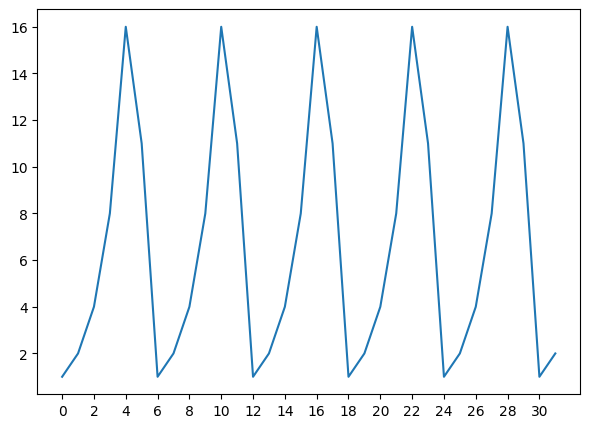

In [99]:
import matplotlib.pyplot as plt
# Diagrama de barras Horizontales
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(7, 5))
# Dibujar el gráfico
x = [i for i in range(2**5)]
f_x = [math.pow(a,i)%N for i in x]
ax.set_xticks([2*i for i in range(2**4)])
ax.plot(x, f_x)
# Mostrar el gráfico
plt.show()

El número de qubits necesarios para la salida es:  10
El número de qubits necesarios total es:  15


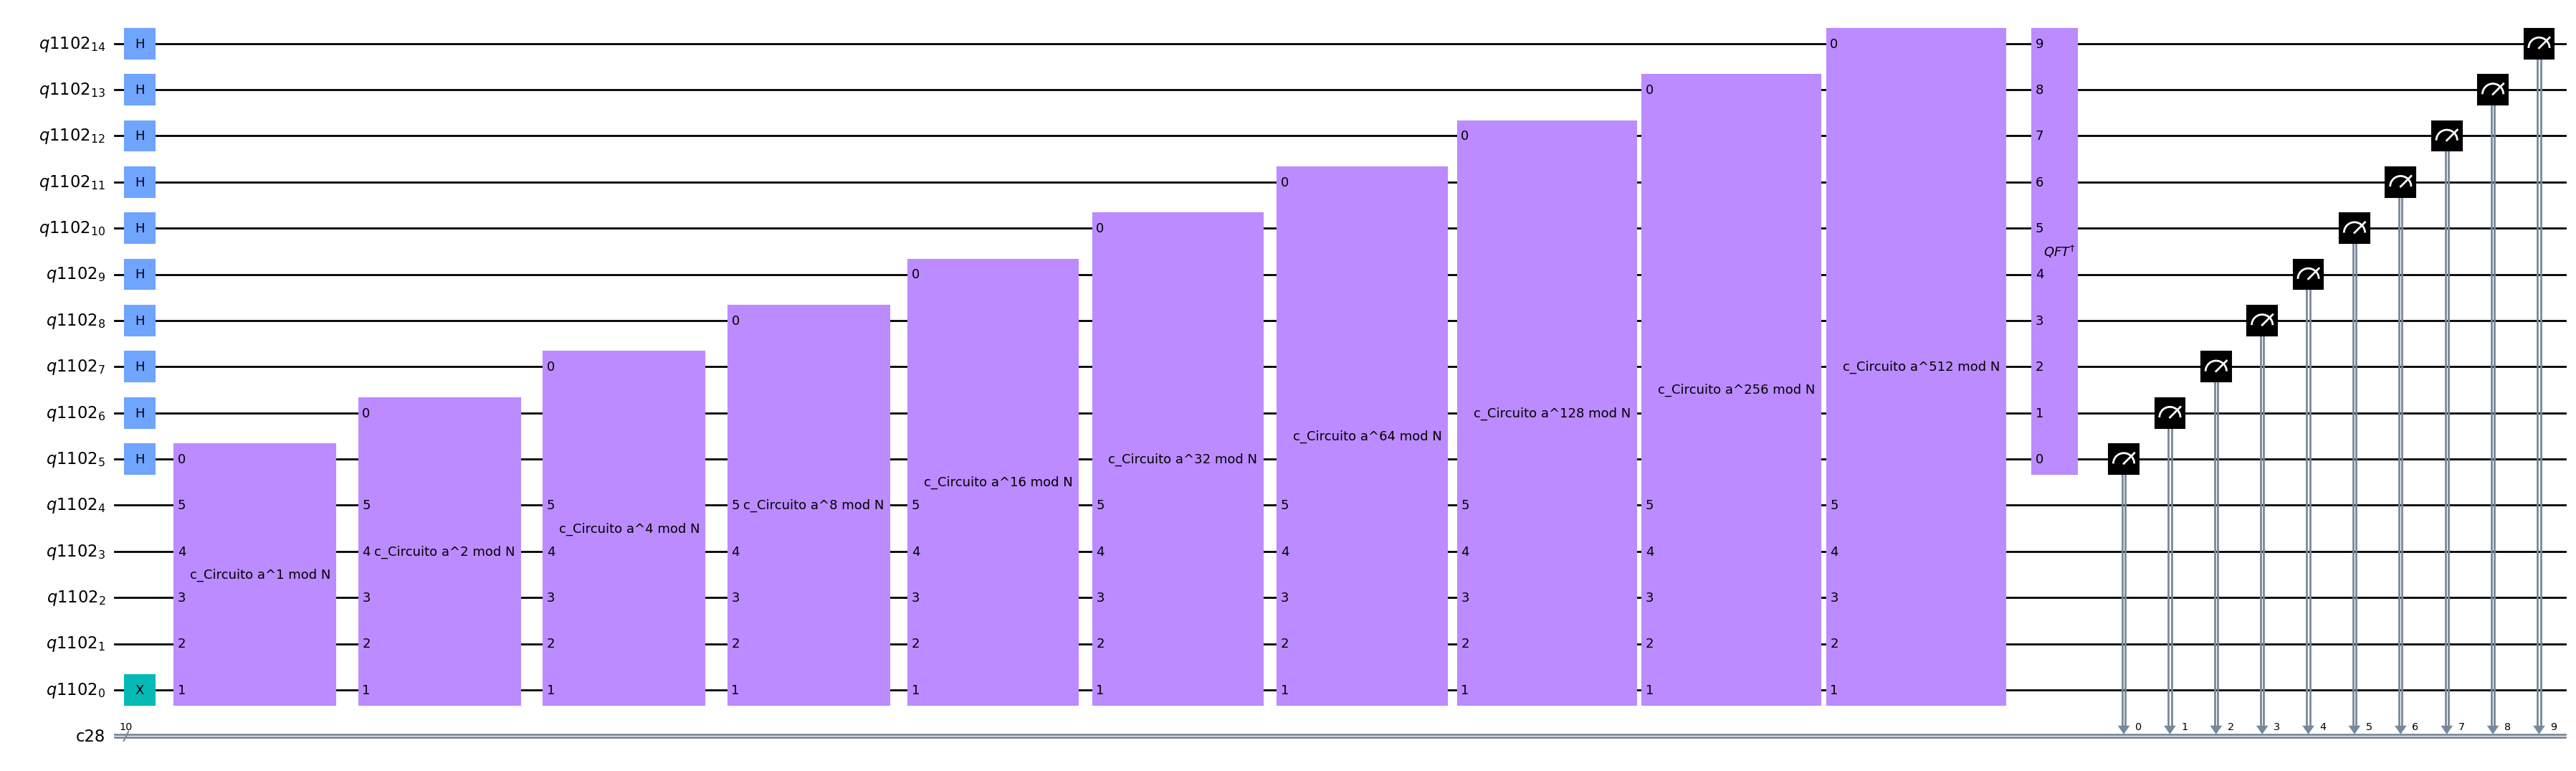

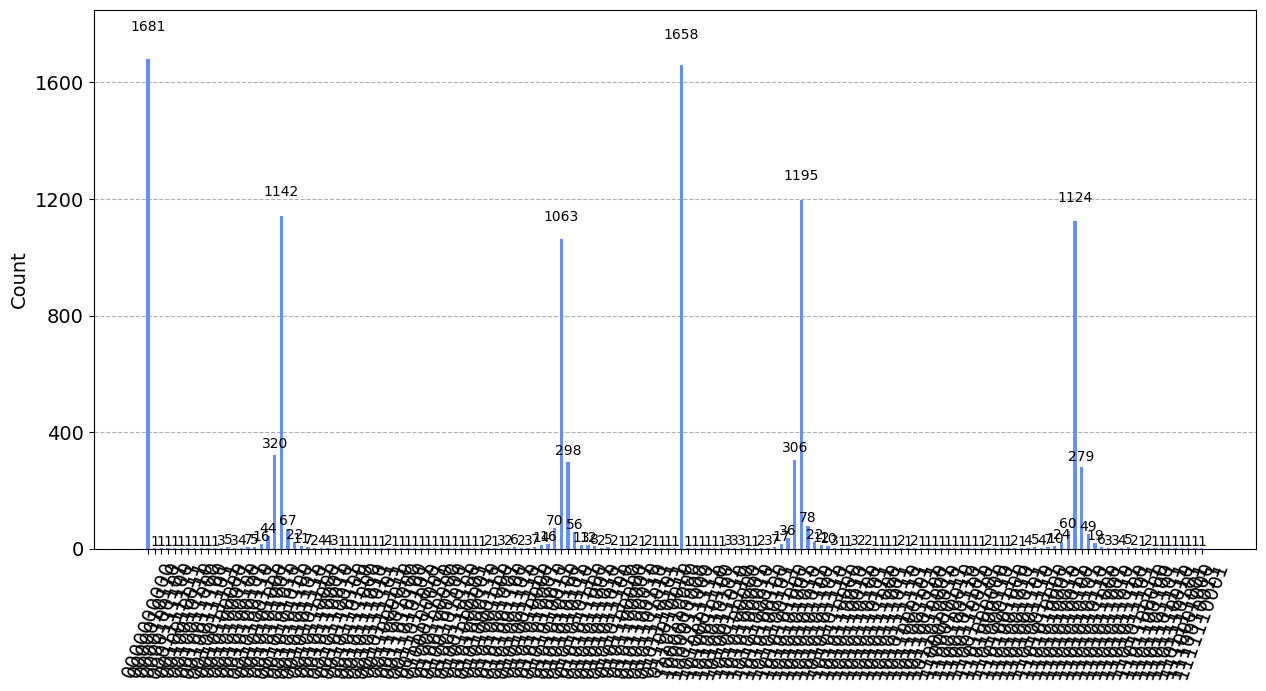

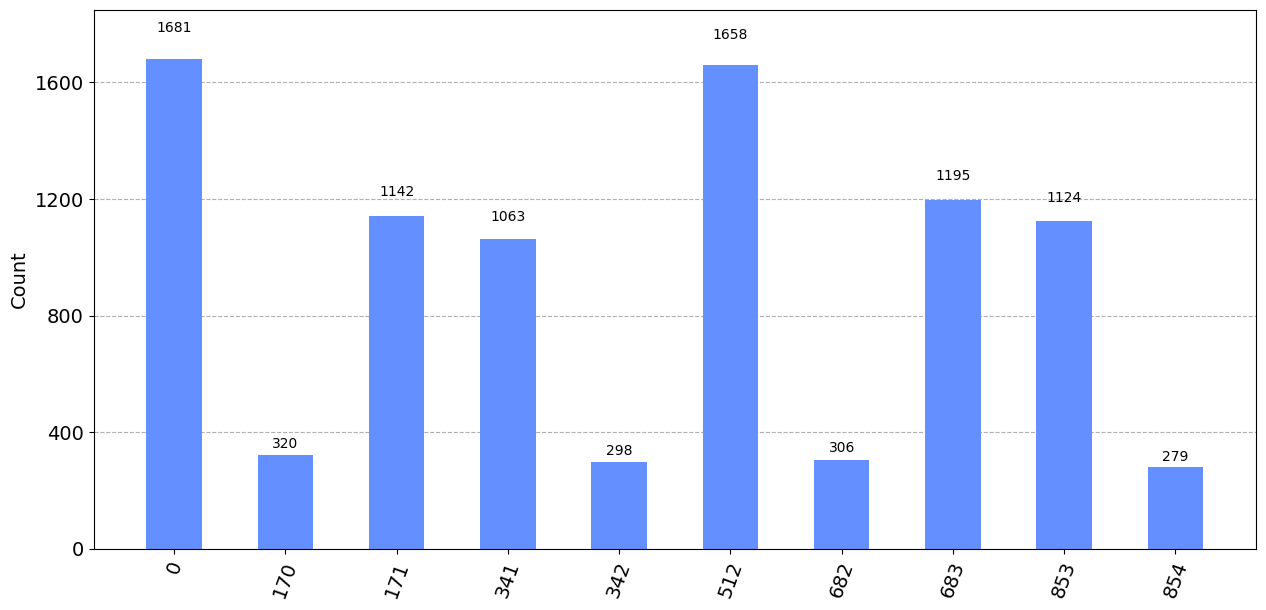

In [100]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit.library import QFT

%run files/gates.py

#Calculamos los qubits que vamos a necesitar
n_in_qubits = int(np.ceil(np.log2(N)))
n_out_qubits = int(2*n_in_qubits)
n_qubits = n_out_qubits + n_in_qubits
print("El número de qubits necesarios para la salida es: ", n_out_qubits)
print("El número de qubits necesarios total es: ", n_qubits)

#Creamos el circuito de Shor
shor_qreg = QuantumRegister(n_qubits)
shor_creg = ClassicalRegister(n_out_qubits)

shor_circ = QuantumCircuit(shor_qreg,shor_creg,name="Shor")

#Aplicamos las puertas hadamard a los 'n_in_qubits' qubits más significativos y la puerta X al qubit menos significativo de a^x mod N
shor_circ.h(range(n_in_qubits,n_qubits))
shor_circ.x(0)

#Aplicamos las puertas (ax_mod_21) multicontroladas 
for i in range(n_out_qubits):
    shor_circ.append(ax_mod_21(2**i).control(1),[n_in_qubits + i] + [i for i in range(n_in_qubits)])

#Aplicamos la Transformada de Fourier cuántica inversa
shor_circ.append(QFT(n_out_qubits,inverse=True, name='$QFT^{\dagger}$'),[i for i in range(n_in_qubits,n_qubits)])

#Medimos
shor_circ.measure([shor_qreg[i] for i in range(n_in_qubits,n_qubits)],[shor_creg[i] for i in range(n_out_qubits)])

#Ejecutamos y mostramos
display(shor_circ.draw("mpl",reverse_bits=True,fold=-1))

job = execute(shor_circ,Aer.get_backend("qasm_simulator"),shots=10000).result()
counts = job.get_counts()

display(plot_histogram(counts,figsize=(15,7)))

counts_dec = {int(k,2):v for k,v in counts.items() if v>=10000*0.01}

display(plot_histogram(counts_dec,figsize=(15,7)))

Vamos a obtener el periodo o un factor del periodo a partir de 2 de los resultados medibles, por ejemplo, 171. Para **171** tenemos la fracción $\frac{171}{1024}$ que expresada como fracción contínua es $[0;5,1,84,2]$. Esta fracción continua la obtenermos de seguir el siguiente procedimiento:

<img src="./files/171-frac-cont.png" alt="Fraccion continua 171" width=600>

Si calculamos todas las convergentes $\frac{P_{k}}{Q_{k}}$ con $k=0,1,2,3,4$ tenemos las fracciones:
\begin{equation}
    [\frac{0}{1},\frac{1}{5},\frac{1}{6},\frac{85}{509},\frac{171}{1024}]
\end{equation}

In [101]:
frac = [0, 5, 1, 84, 2]
for i in range(1, len(frac) + 1):
    print("La convergente " + str(i) + " es: ", pqk(frac[:i]))

La convergente 1 es:  (0, 1)
La convergente 2 es:  (1, 5)
La convergente 3 es:  (1, 6)
La convergente 4 es:  (85, 509)
La convergente 5 es:  (171, 1024)


Ahora tomamos la última convergente cuyo denominador sea menor que 21. Esta convergente es $\frac{1}{6}$ y el denominador es **6** que si comprobamos $f(x)=f(x+6)$ vemos que es efectivamente el periodo.

Este cálculo podemos llevarlo a cabo con la clase **Fraction** del módulo **fractions** y con el método **.limit_denominator(numero)** de dicho objeto. Para crear un objeto de la clase **Fraction** hay que llamar al constructor con dos argumentos que son el numerador y el denominador de la siguiente forma **Fraction(numerador, denominador)**. Una vez creado el objeto, podemos llamar al método **.limit_denominator(numero)** que nos devolverá la última convergente con denominador menor que **numero**.

In [102]:
from fractions import Fraction
convergente = Fraction(171,2**10).limit_denominator(N)
print("La medida es " + str(171) + " la convergente es " + str(convergente))

La medida es 171 la convergente es 1/6


Si calculamos los posibles periodos de todas las medidas filtradas del apartado anterior obtenemos el periodo **(6)** y factores del periodo **(2, 3)**.

In [103]:
#Calculamos todos los posibles periodos
mediciones = sorted([int(k,2) for k in counts.keys() if counts[k]>=10000*0.01])
print(mediciones)

for i in mediciones:
    convergente = Fraction(i,2**10).limit_denominator(N)
    print("La medida es " + str(i) + " la convergente es " + str(convergente) + ". Periodo " + str(convergente.denominator))


[0, 170, 171, 341, 342, 512, 682, 683, 853, 854]
La medida es 0 la convergente es 0. Periodo 1
La medida es 170 la convergente es 1/6. Periodo 6
La medida es 171 la convergente es 1/6. Periodo 6
La medida es 341 la convergente es 1/3. Periodo 3
La medida es 342 la convergente es 1/3. Periodo 3
La medida es 512 la convergente es 1/2. Periodo 2
La medida es 682 la convergente es 2/3. Periodo 3
La medida es 683 la convergente es 2/3. Periodo 3
La medida es 853 la convergente es 5/6. Periodo 6
La medida es 854 la convergente es 5/6. Periodo 6


Una ver obtenido el periodo 6, ya podemos calcular algún factor de 21. Para calcular algún factor de 21 tenemos que calcular $mcd\left(a^{\frac{6}{2}}\pm 1,21\right)$. 
 - $mcd\left(a^{3}+ 1,21\right)=?$
 - $mcd\left(a^{3}- 1,21\right)=?$

In [104]:
r = 6
print("El mcd de 9 y 21 es ", math.gcd(a**(r//2)+1,N))
print("El mcd de 7 y 21 es ", math.gcd(a**(r//2)-1,N))

El mcd de 9 y 21 es  3
El mcd de 7 y 21 es  7


En este caso hemos obtenido en ambos cálculos un factor de 21, es decir, hemos obtenido el **?** y el **?**.

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>

Factorizar el número 15. La función **c_amod15(a, i)** nos devuelve el operador cuántico $U_{(a\ mod\ 21)}^{i}$ cuyo tamaño es de 4 qubits. Este operador es válido para valores de $a=2,7,8,11,13$.

#### 1. Se elige un número aleatorio entre 1 y N:

In [105]:
import random
random.seed(9)
N = 15
a = round(random.random()*N)
print("El número es: ", a)

El número es:  7


#### 2. Se calcula el m.c.d(a, N):

In [106]:
import math
mcd = math.gcd(a,N)
print("El mcd es: ", mcd)

El mcd es:  1


#### 3. Se obtiene el periodo **r** de la función $f(x) = a^{x} mod N$:

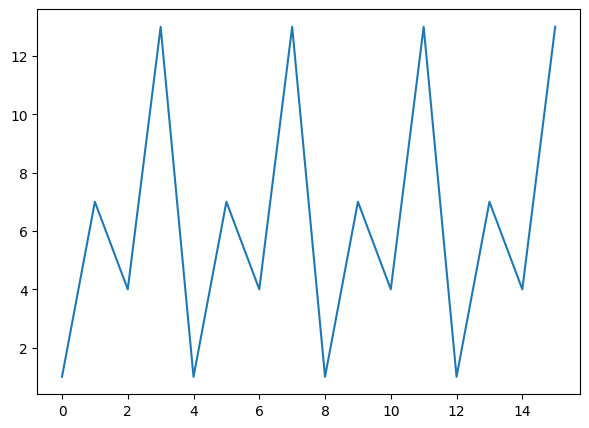

In [107]:
import matplotlib.pyplot as plt
# Diagrama de barras Horizontales
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(7, 5))
# Dibujar el gráfico
x = [i for i in range(2**4)]
f_x = [math.pow(a,i)%N for i in x]
ax.plot(x, f_x)
ax.set_xticks([2*i for i in range(2**3)])
# Mostrar el gráfico
plt.show()

El número de qubits necesarios para la salida es:  8
El número de qubits necesarios total es:  12


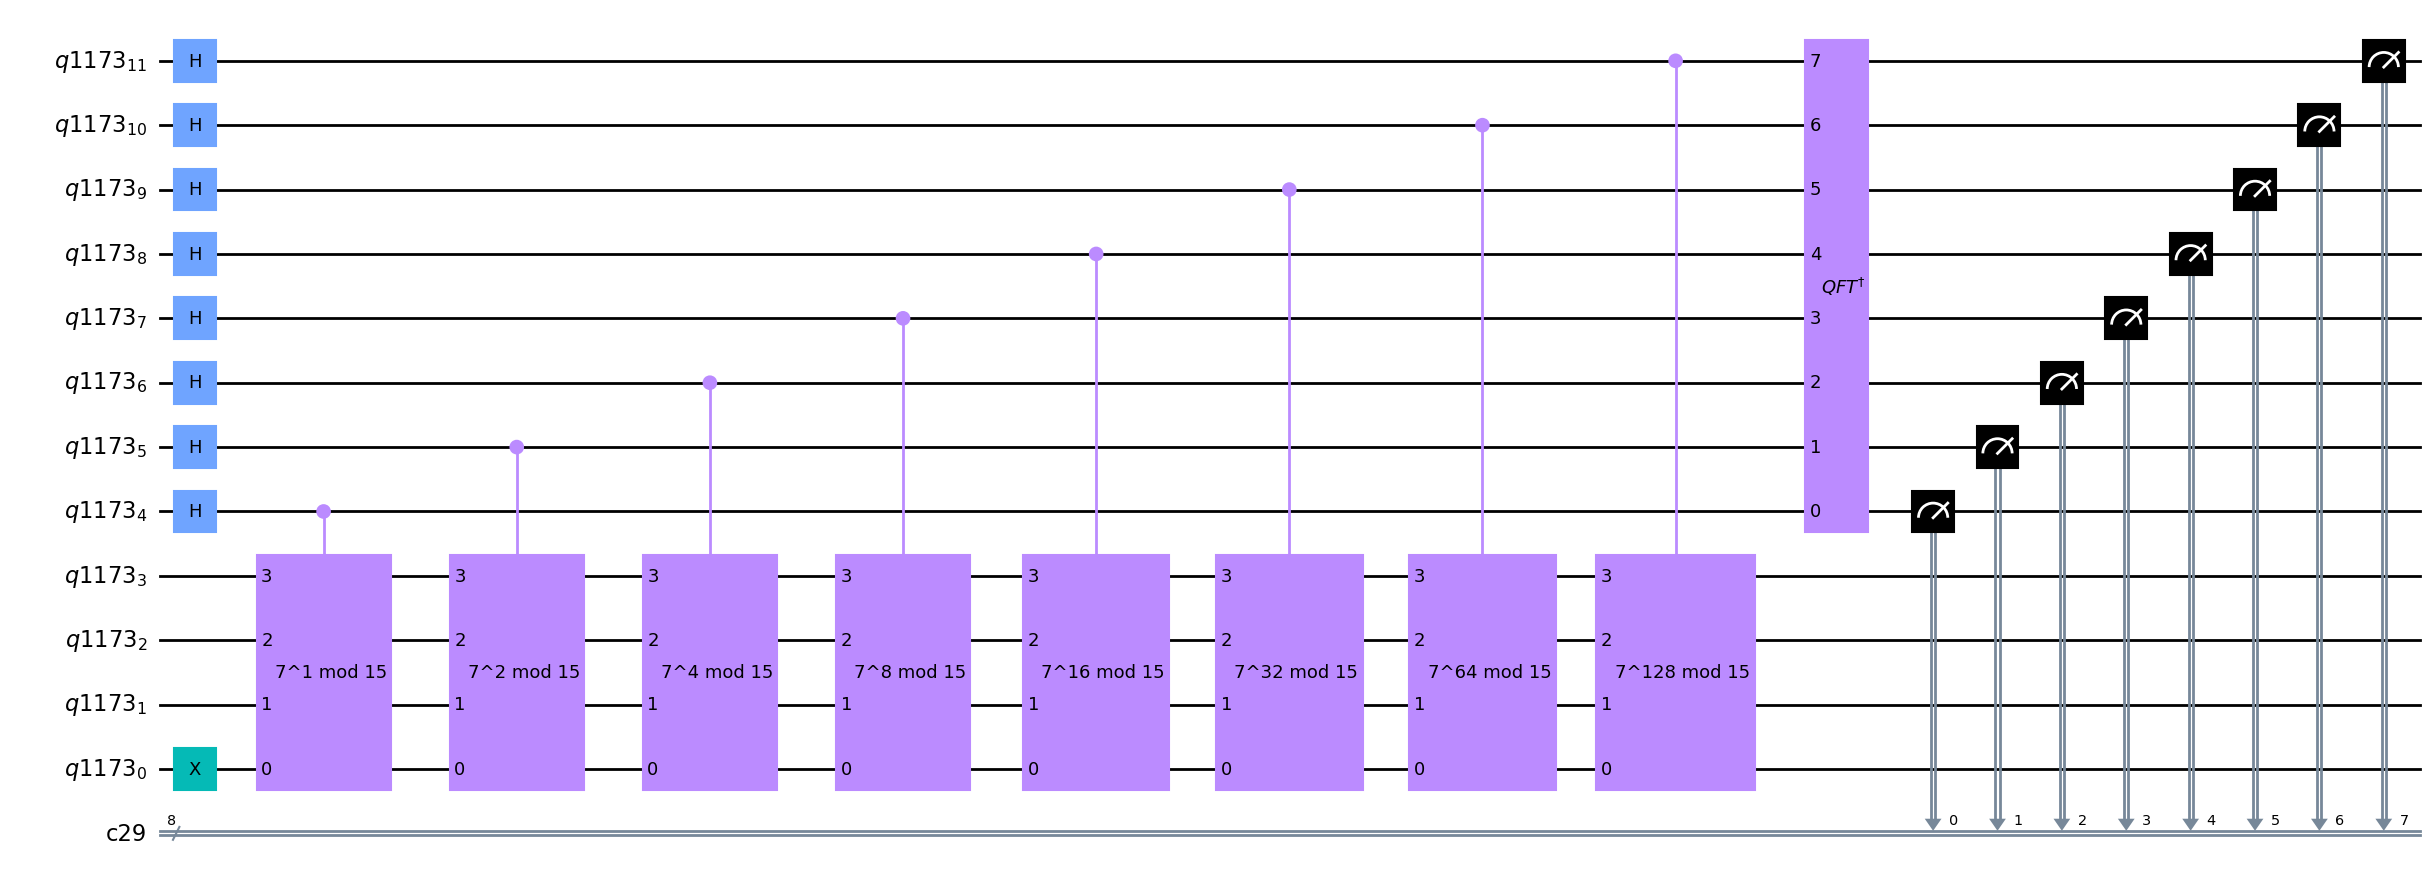

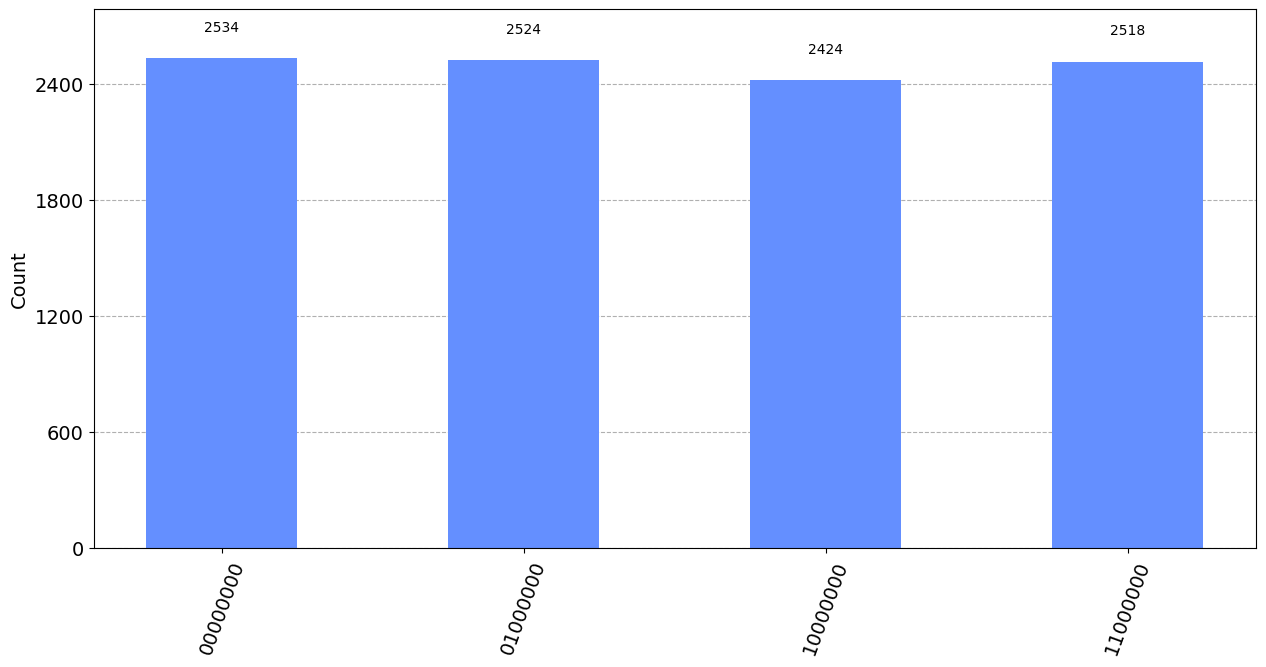

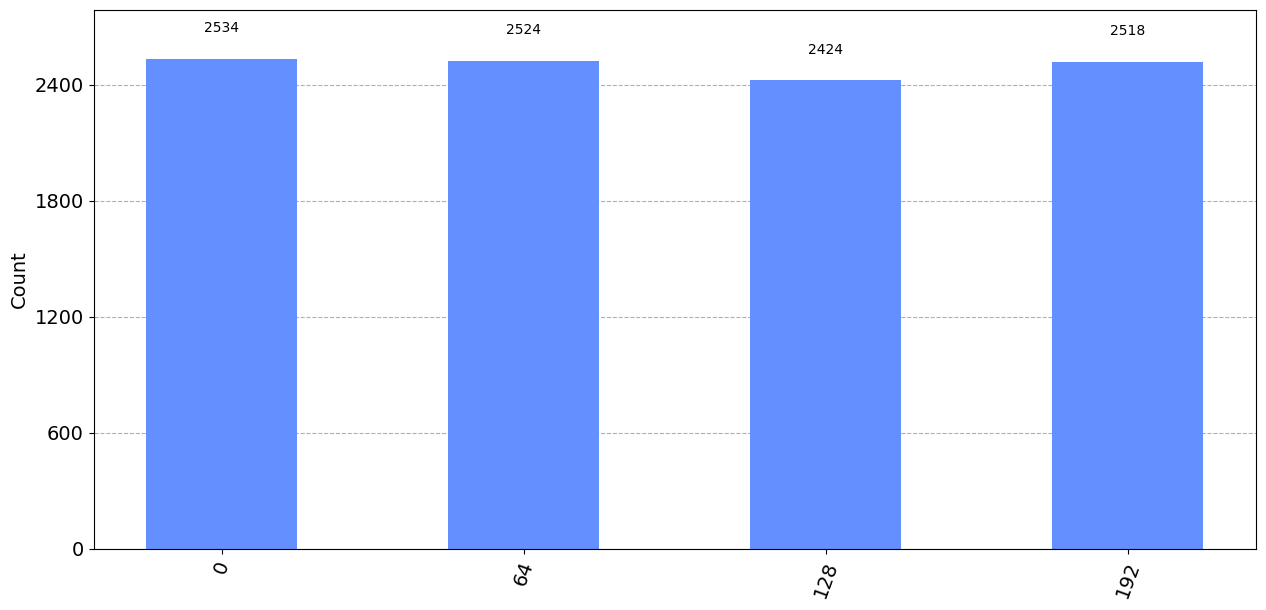

In [108]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit.library import QFT

%run files/gates.py

#Calculamos los qubits que vamos a necesitar
n_in_qubits = int(np.ceil(np.log2(N)))
n_out_qubits = int(2*n_in_qubits)
n_qubits = n_out_qubits + n_in_qubits
print("El número de qubits necesarios para la salida es: ", n_out_qubits)
print("El número de qubits necesarios total es: ", n_qubits)

#Creamos el circuito de Shor
shor_qreg = QuantumRegister(n_qubits)
shor_creg = ClassicalRegister(n_out_qubits)

shor_circ = QuantumCircuit(shor_qreg,shor_creg,name="Shor")

#Aplicamos las puertas hadamard a los 'n_in_qubits' qubits más significativos y la puerta X al qubit menos significativo de a^x mod N
shor_circ.h(range(n_in_qubits,n_qubits))
shor_circ.x(0)

#Aplicamos las puertas (ax_mod_21) multicontroladas 
for i in range(n_out_qubits):
    shor_circ.append(c_amod15(a,2**i).control(1),[n_in_qubits + i] + [i for i in range(n_in_qubits)])

#Aplicamos la Transformada de Fourier cuántica inversa
shor_circ.append(QFT(n_out_qubits,inverse=True, name='$QFT^{\dagger}$'),[i for i in range(n_in_qubits,n_qubits)])

#Medimos
shor_circ.measure([shor_qreg[i] for i in range(n_in_qubits,n_qubits)],[shor_creg[i] for i in range(n_out_qubits)])

#Ejecutamos y mostramos
display(shor_circ.draw("mpl",reverse_bits=True,fold=-1))

job = execute(shor_circ,Aer.get_backend("qasm_simulator"),shots=10000).result()
counts = job.get_counts()

display(plot_histogram(counts,figsize=(15,7)))

counts_dec = {int(k,2):v for k,v in counts.items() if v>=10000*0.01}

display(plot_histogram(counts_dec,figsize=(15,7)))

In [109]:
for measure in list(counts_dec):
    denominator = Fraction(measure,2**n_out_qubits).limit_denominator(N).denominator
    print("La medida es " + str(measure) + " y obtenemos como periodo " + str(denominator))

La medida es 128 y obtenemos como periodo 2
La medida es 64 y obtenemos como periodo 4
La medida es 0 y obtenemos como periodo 1
La medida es 192 y obtenemos como periodo 4


Una ver obtenido el periodo ?, ya podemos calcular algún factor de 15. Para calcular algún factor de 15 tenemos que calcular $mcd\left(a^{\frac{?}{2}}\pm 1,15\right)$:

In [110]:
r = 4
print("El mcd de 50 y 15 es ", math.gcd(a**(r//2)+1,N))
print("El mcd de 48 y 15 es ", math.gcd(a**(r//2)-1,N))

El mcd de 50 y 15 es  5
El mcd de 48 y 15 es  3


En este caso hemos obtenido en ambos cálculos un factor de 15, es decir, hemos obtenido el **?** y el **?**.